<a href="https://colab.research.google.com/github/Dexne/Artificial_Intelligence_Seminar/blob/main/09_Algoritmos_de_agrupaci%C3%B3n/algoritmos_de_agrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparación de algoritmos de agrupación

In [8]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture, metrics
from sklearn.preprocessing import StandardScaler

In [9]:
# Crear datos de prueba
np.random.seed(0)
n_samples = 1500
X = 6*[None] # lista para los datasets

# Circulos concentricos
xtemp, _ = datasets.make_circles(n_samples = n_samples, factor=.5, noise=.05)
X[0] = StandardScaler().fit_transform(xtemp)

# Lunas
xtemp, _ = datasets.make_moons(n_samples = n_samples, noise=.05)
X[1] = StandardScaler().fit_transform(xtemp)

# Blobs
xtemp, _ = datasets.make_blobs(n_samples = n_samples, random_state=8)
X[2] = StandardScaler().fit_transform(xtemp)

# plano sin agrupaciones
xtemp = np.random.rand(n_samples, 2)
X[3] = StandardScaler().fit_transform(xtemp)

# Blobs con deformación anisotropica
xtemp, _ = datasets.make_blobs(n_samples = n_samples, random_state=170)
xtremp = np.dot(xtemp, [[0.6, -0.6], [-0.4, 0.8]])
X[4] = StandardScaler().fit_transform(xtemp)

# Blobs con varias varianzas
xtemp, _ = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=142)
X[5] = StandardScaler().fit_transform(xtemp)

# number of cluster
classes = [2,2,3,3,3,3]

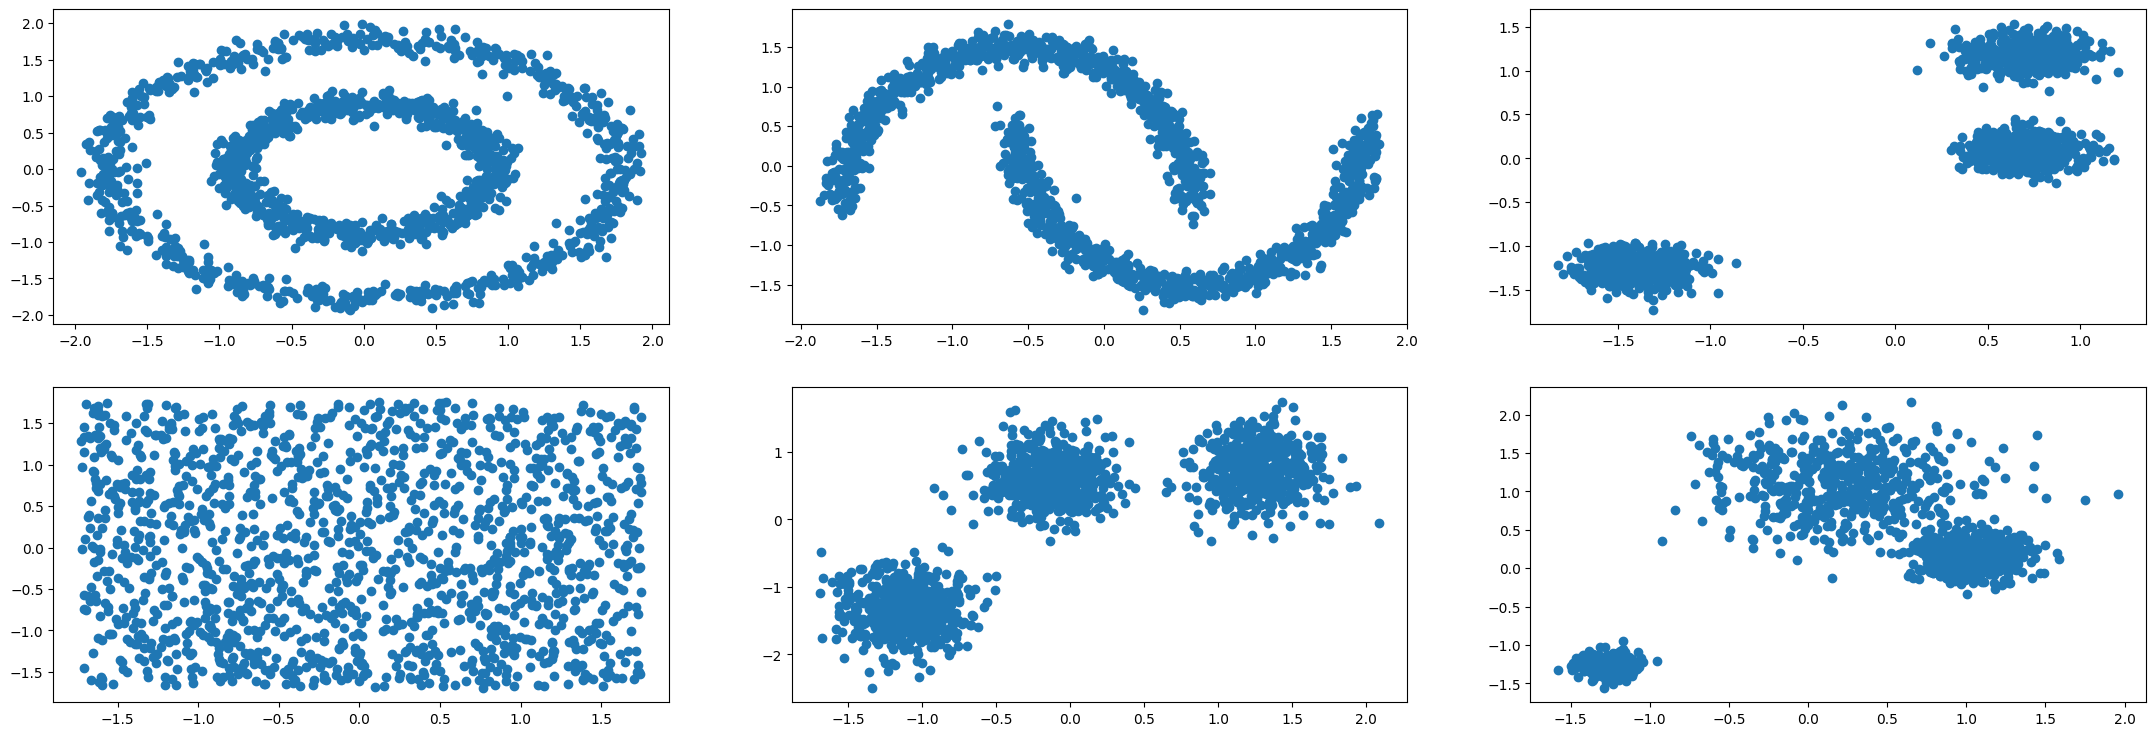

In [10]:
## Dibujar
plt.figure(figsize=(27,9))
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1])

Ploteamos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

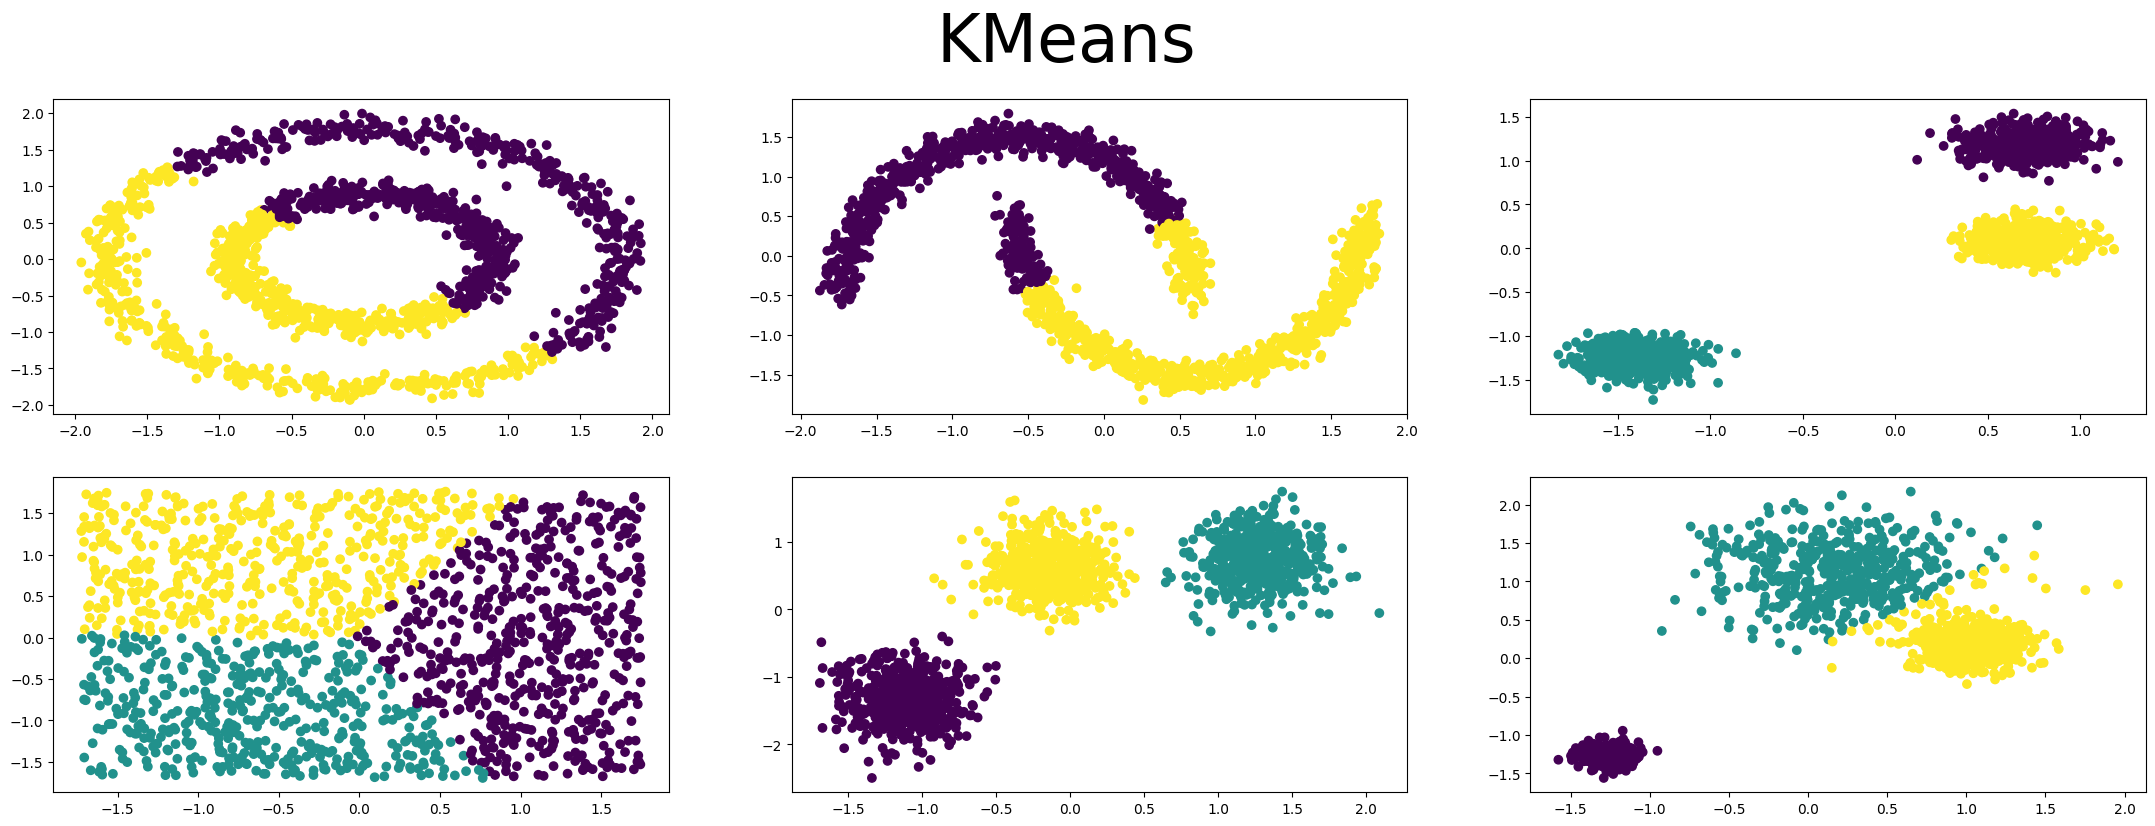

In [13]:
y = []
for c, x in zip(classes, X):
  model = cluster.KMeans(n_clusters=c)
  model.fit(x) # No supervisado

  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(int))
  else:
    y.append(model.predict(x))

# Dibujamos cambiando el color segunc cada uno de los puntos
fig = plt.figure(figsize=(27,9))
fig.suptitle('KMeans', fontsize=48)
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

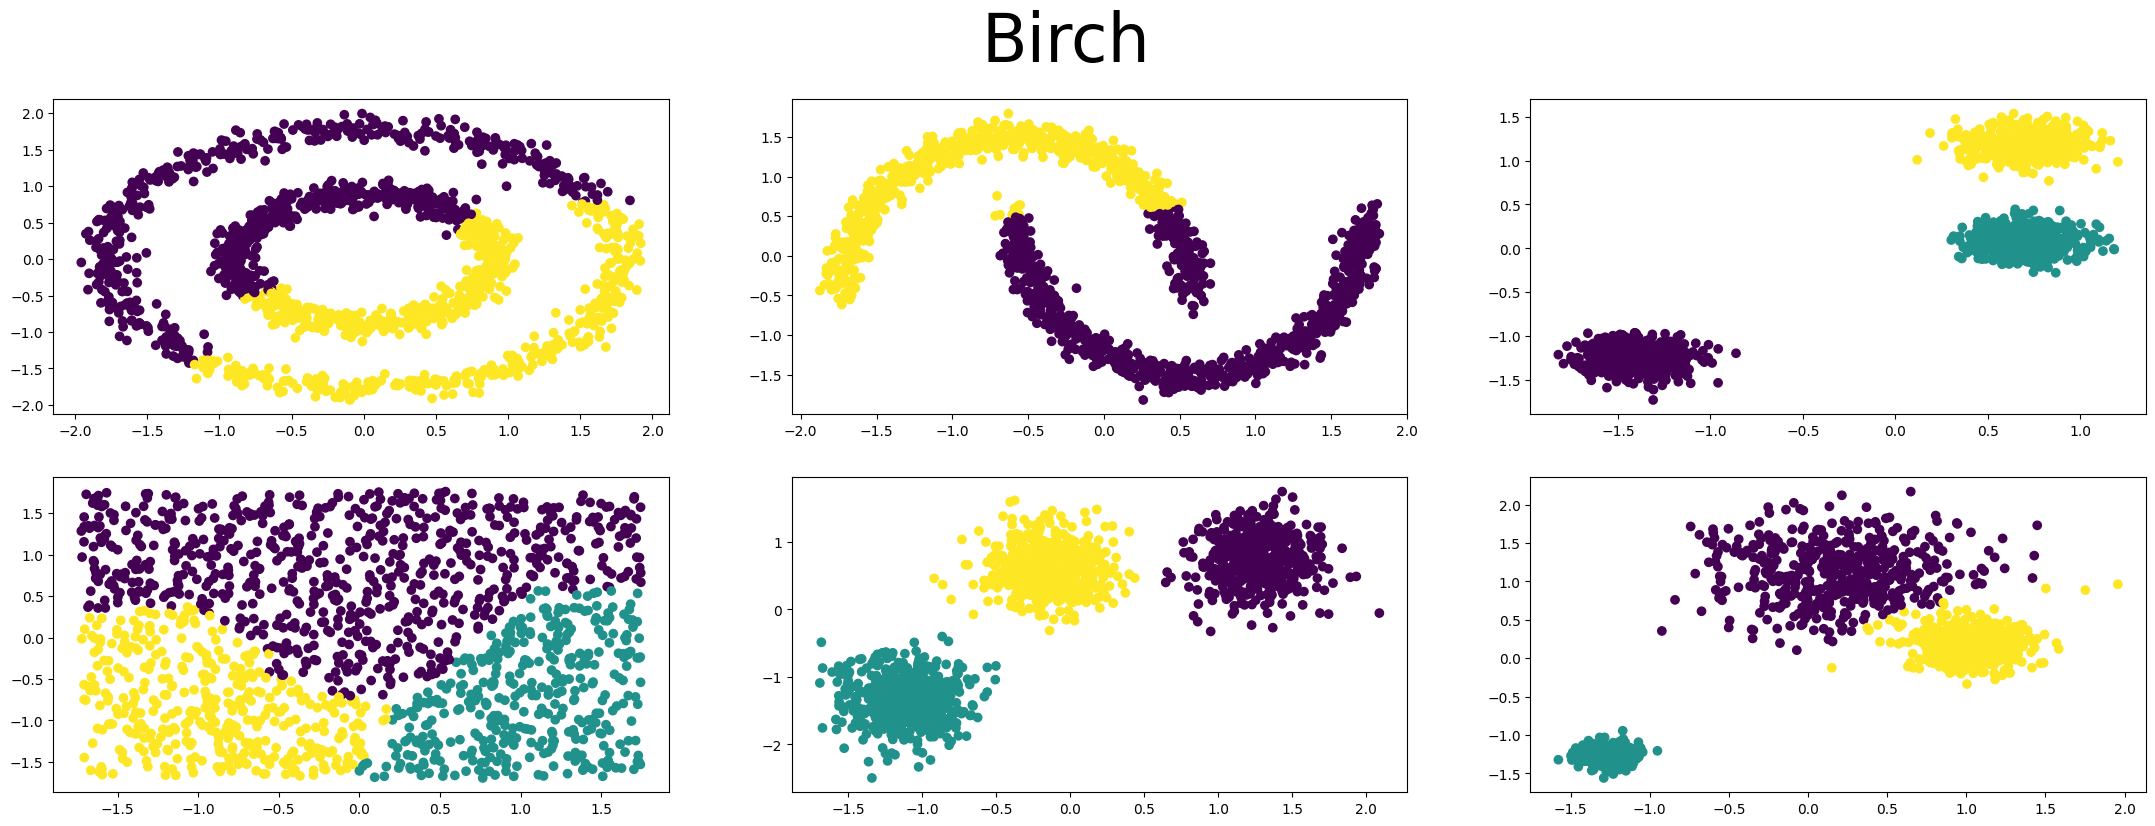

In [16]:
y = []
for c, x in zip(classes, X):
  model = cluster.Birch(n_clusters=c)
  model.fit(x)
  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('Birch', fontsize=48)
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


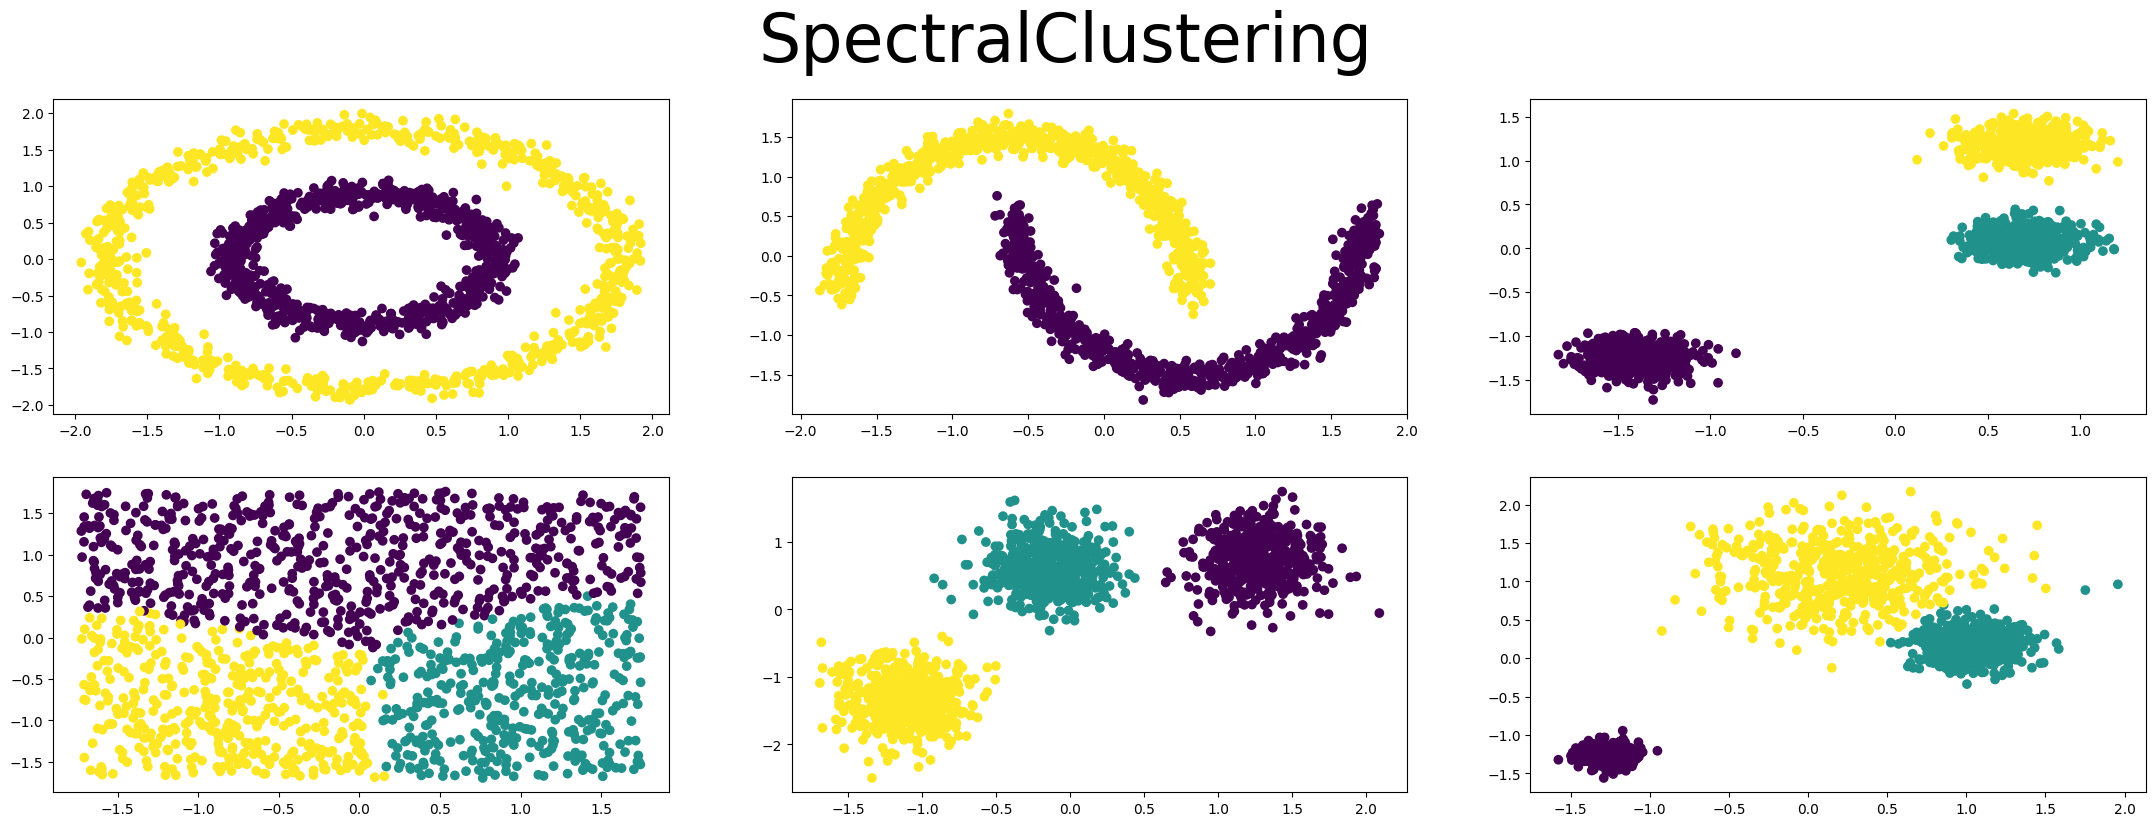

In [21]:
from sklearn.cluster import SpectralClustering

y = []
for c, x in zip(classes, X):
    model = SpectralClustering(n_clusters=c, affinity="nearest_neighbors")
    model.fit(x)

    if hasattr(model, 'labels_'):
        y.append(model.labels_.astype(int))
    else:
        y.append(model.predict(x))

fig = plt.figure(figsize=(27, 9))
fig.suptitle('SpectralClustering', fontsize=48)
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    ax.scatter(X[i][:, 0], X[i][:, 1], c=y[i])


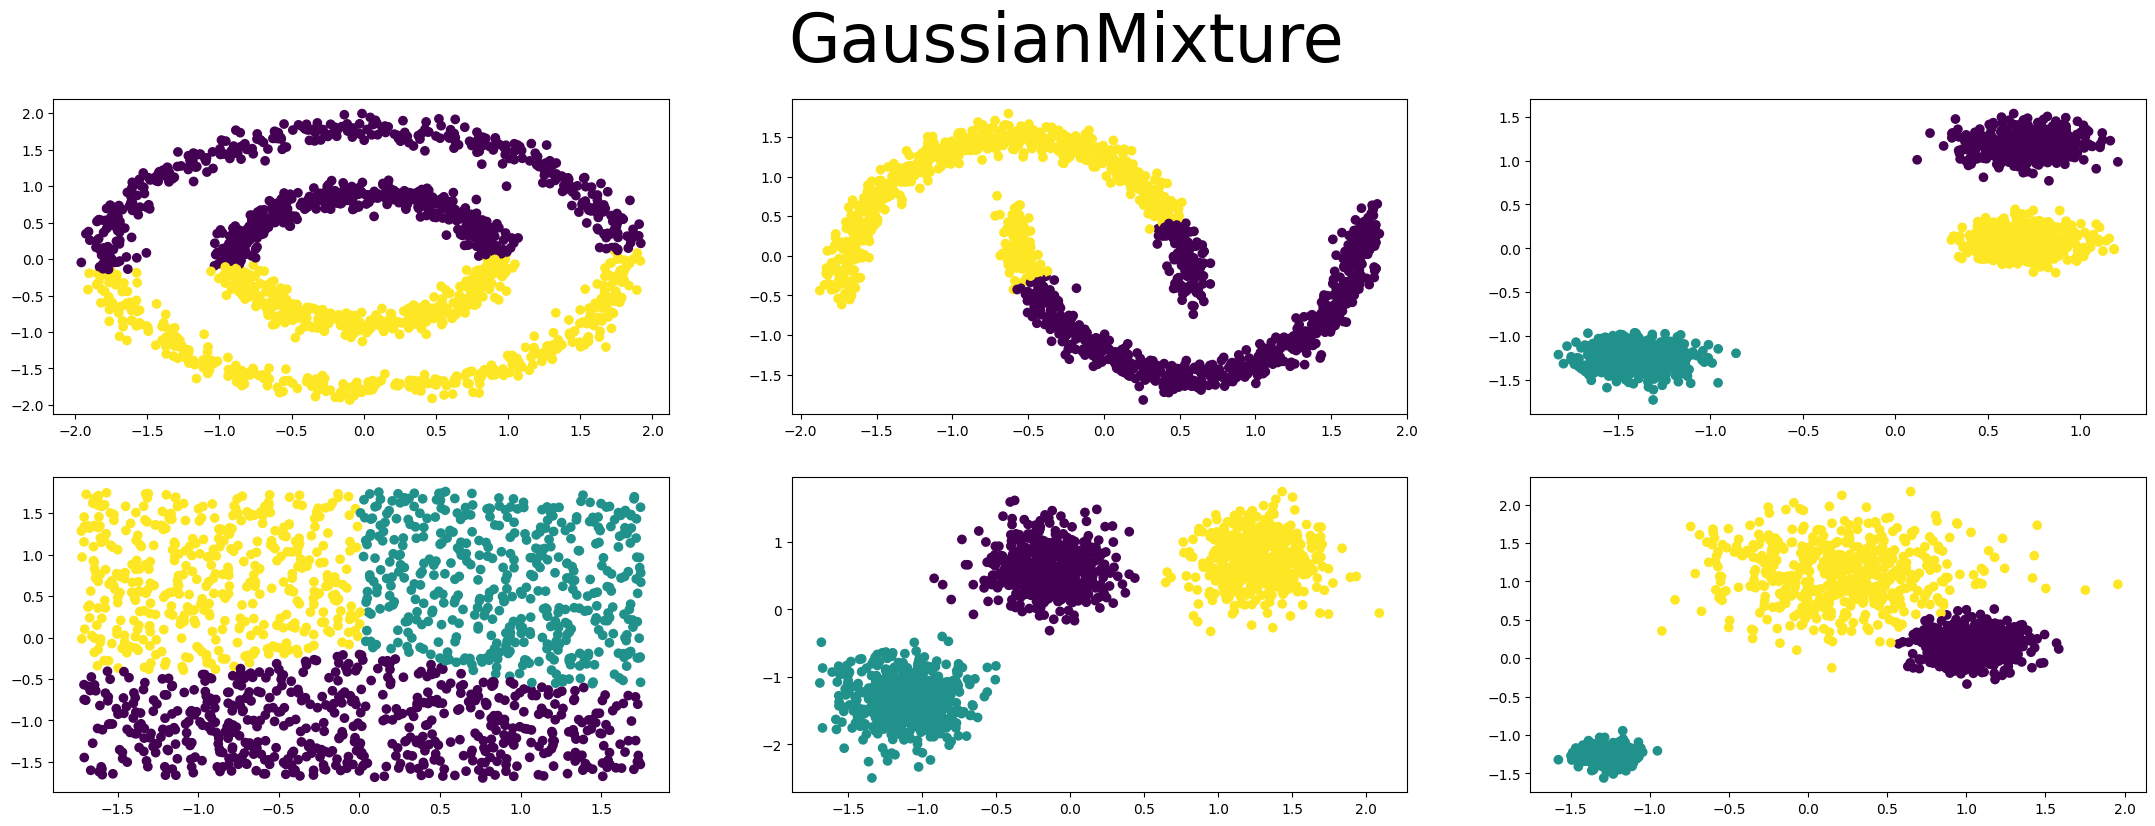

In [24]:
y = []
for c, x in zip(classes, X):
  model = mixture.GaussianMixture(n_components=c, covariance_type='full')
  model.fit(x)

  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('GaussianMixture', fontsize=48)
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

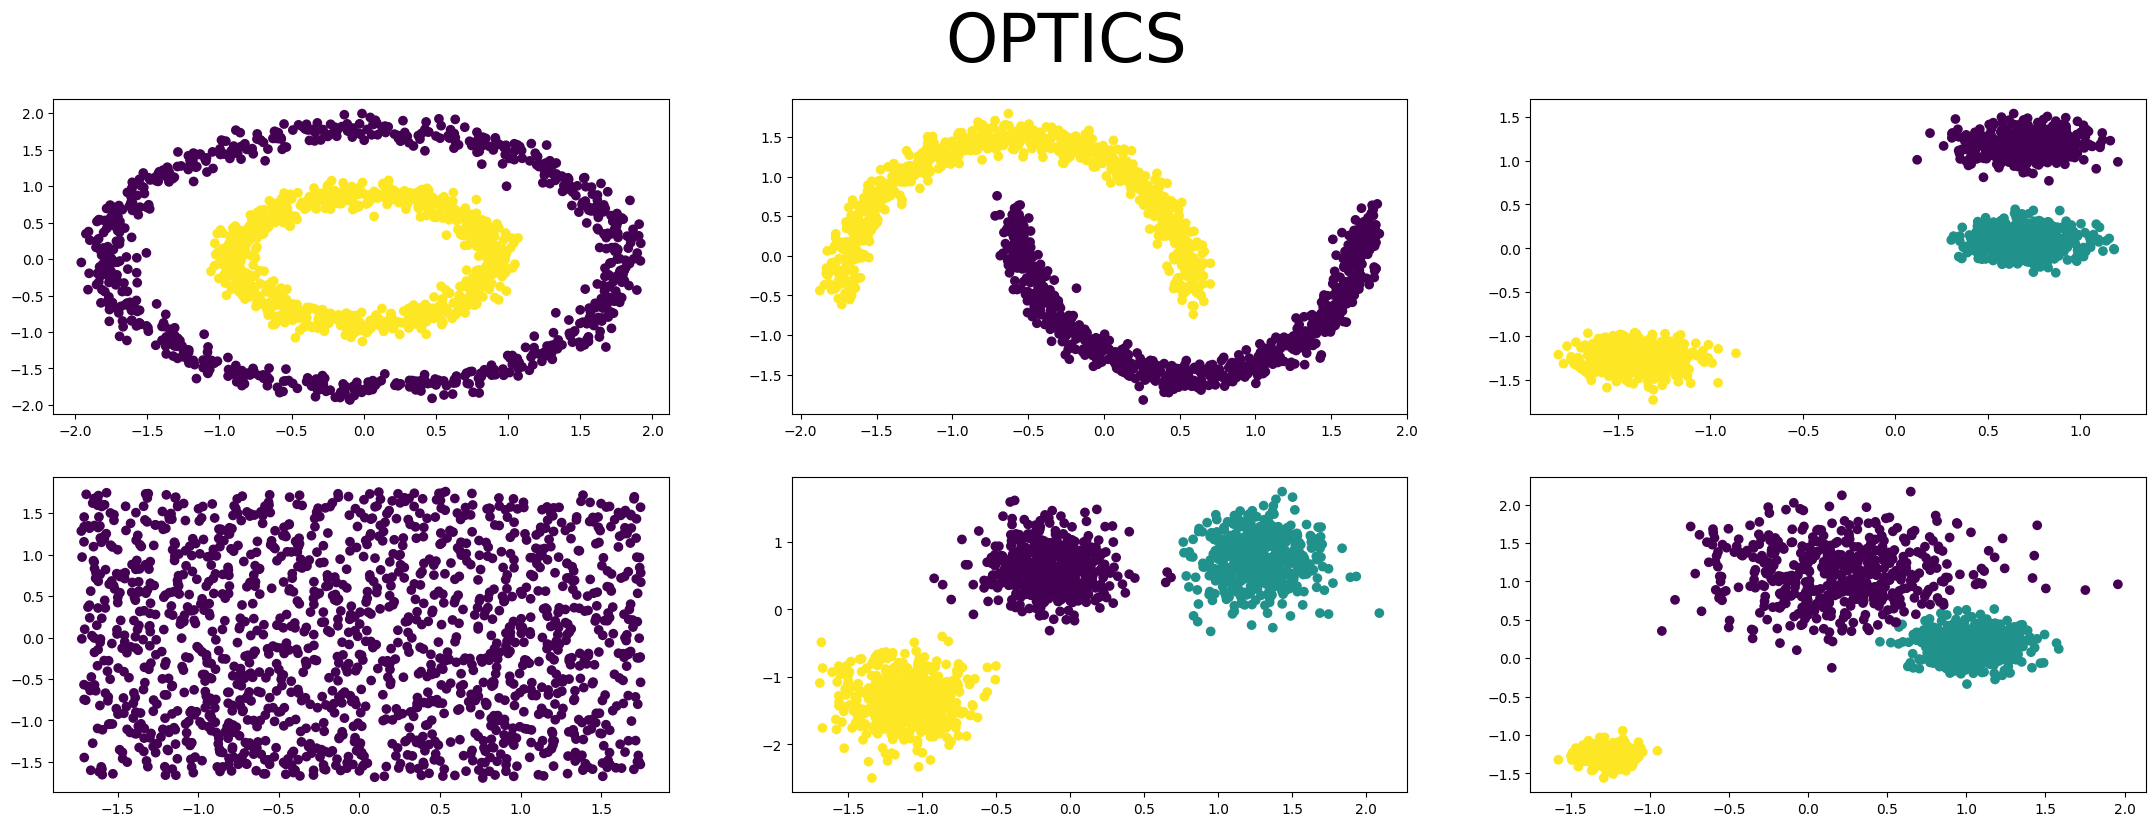

In [26]:
y = []
for c, x in zip(classes, X):
  model = cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)
  model.fit(x)

  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('OPTICS', fontsize=48)
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])

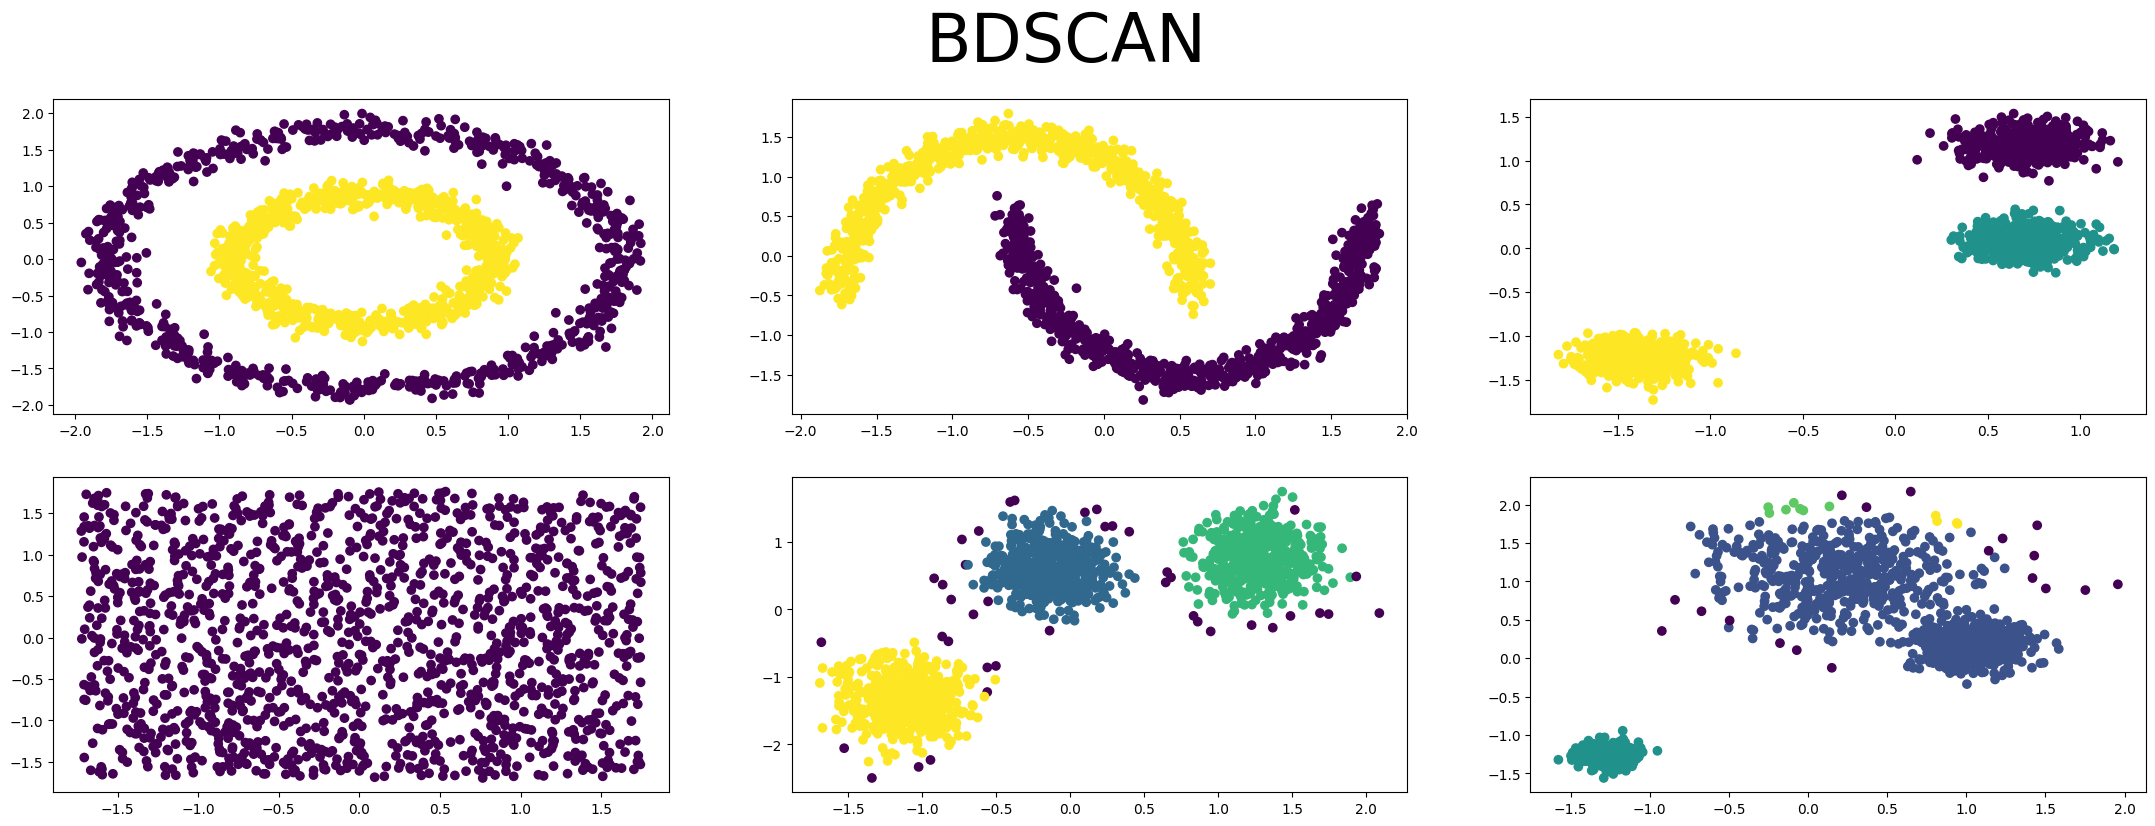

In [29]:
y = []
eps = [0.3, 0.3, 0.3, 0.3, 0.15, 0.18]
for c, x, e in zip(classes, X, eps):
  model = cluster.DBSCAN(eps = e)
  model.fit(x)

  if hasattr(model, 'labels_'):
    y.append(model.labels_.astype(int))
  else:
    y.append(model.predict(x))

fig = plt.figure(figsize=(27,9))
fig.suptitle('BDSCAN', fontsize=48)
for i in range(6):
  ax = plt.subplot(2,3, i+1)
  ax.scatter(X[i][:,0], X[i][:,1], c=y[i])